# 0. Load Data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
np.set_printoptions(suppress=True)

In [24]:
covid = pd.read_excel("./dataset/covid_kaggle.xlsx")

In [25]:
covid.shape

(5644, 111)

# 1. Data Wash

Remove test results for other viruses, we'd like to predict the SARS-Cov-2 test result.

In [26]:
covid = covid.drop(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Parainfluenza 1', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Influenza B, rapid test', 'Influenza A, rapid test'], axis=1)

Remove irrelvalent Features including patients ID and patients intention to the ward level.

In [27]:
covid = covid.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1)

Less than 100 patients among 5644 took urine tests.

In [28]:
urine_features = ['Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 'Urine - Density', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Sugar', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Red blood cells', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']

In [29]:
covid = covid.drop(urine_features, axis=1)

Less than 100 patients among 5644 took aerial blood gas tests.

In [30]:
arterial_blood_gas_features = ['Hb saturation (arterial blood gases)', 'pCO2 (arterial blood gas analysis)', 'Base excess (arterial blood gas analysis)', 'pH (arterial blood gas analysis)', 'Total CO2 (arterial blood gas analysis)', 'HCO3 (arterial blood gas analysis)', 'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor', 'ctO2 (arterial blood gas analysis)']

In [31]:
covid = covid.drop(arterial_blood_gas_features, axis=1)

Reamove features containing less than 100 patients' records

In [32]:
i = 0
for column in covid:
    if (covid[column].count() < 100):
        print(column, covid[column].count())
        covid = covid.drop(column, axis=1)

Mycoplasma pneumoniae 0
Ionized calcium  50
Magnesium 40
Fio2 (venous blood gas analysis) 1
Rods # 97
Segmented 97
Promyelocytes 97
Metamyelocytes 97
Myelocytes 97
Myeloblasts 97
Partial thromboplastin time (PTT)  0
Relationship (Patient/Normal) 91
Prothrombin time (PT), Activity 0
Vitamin B12 3
Ferritin 23
Arterial Lactic Acid 27
Lipase dosage 8
D-Dimer 0
Albumin 13


Drop constant features

In [33]:
covid = covid.loc[:,covid.apply(pd.Series.nunique) != 1]

Drop features has least patients' records

In [34]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]

In [35]:
# [ [covid.columns.get_loc(c), c] for c in sorted_features if c in covid]

Now all features contain at least 100 patients' record

In [36]:
covid_init = covid[sorted_features[-1]]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 5644
Patient age quantile 5644
Hemoglobin 603
Hematocrit 603
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 506
Creatinine 424
Urea 397
Potassium 371
Sodium 370
Strepto A 332
Aspartate transaminase 226
Alanine transaminase 225
Serum Glucose 208
Total Bilirubin 182
Indirect Bilirubin 182
Direct Bilirubin 182
Gamma-glutamyltransferase  153
Alkaline phosphatase 144
pO2 (venous blood gas analysis) 136
pH (venous blood gas analysis) 136
pCO2 (venous blood gas analysis) 136
Total CO2 (venous blood gas analysis) 136
Hb saturation (venous blood gas analysis) 136
HCO3 (venous blood gas analysis) 136
Base excess (venous blood gas analysis) 136
International normalized ratio (INR) 

In [37]:
removed_features = ['Lactic Dehydrogenase', 'Creatine phosphokinase\xa0(CPK)\xa0', 'International normalized ratio (INR)', 'Base excess (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Total CO2 (venous blood gas analysis)', 'pCO2 (venous blood gas analysis)', 'pH (venous blood gas analysis)', 'pO2 (venous blood gas analysis)', 'Alkaline phosphatase', 'Gamma-glutamyltransferase\xa0', 'Direct Bilirubin', 'Indirect Bilirubin', 'Total Bilirubin', 'Serum Glucose', 'Alanine transaminase', 'Aspartate transaminase', 'Strepto A', 'Sodium', 'Potassium', 'Urea', 'Creatinine']

In [38]:
covid = covid.drop(removed_features, axis=1)

Drop patients that have less than 10 records

In [39]:
for index, row in covid.iterrows():
    if row.count() < 10:
        covid.drop(index, inplace=True)

Now we have more than 500 records

In [40]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 602
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Patient age quantile 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Hemoglobin 602
Hematocrit 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 502


Drop NaN

In [41]:
covid = covid.dropna()

Map classification string to 0-1

In [42]:
covid['SARS-Cov-2 exam result'] = covid['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

In [76]:
covid.shape

(420, 18)

# 2. Train test split

In [44]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [45]:
y = covid["SARS-Cov-2 exam result"].to_numpy()

In [46]:
X = covid
X = X.drop(["SARS-Cov-2 exam result"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 1)

In [47]:
X_train.shape

(378, 17)

In [48]:
X_test.shape

(42, 17)

In [49]:
print(np.sum(y_test), "positive among", len(y_test), 'patients')

8 positive among 42 patients


# 3. Feature Selection

### 3.1 Basic Methods

#### 3.1.1 Drop constant and Quasi-constant features

In [126]:
from sklearn.feature_selection import VarianceThreshold

In [127]:
def drop_features(X_train, X_test, threshhold):
    sel = VarianceThreshold(threshold=threshhold)
    sel.fit(X_train)
    print("No. of constant features:",
        len([
            x for x in X_train.columns
            if x not in X_train.columns[sel.get_support()]
        ])
    )
    constant_features = [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

    print(constant_features)
    X_train.drop(labels=constant_features, axis=1, inplace=True)
    X_test.drop(labels=constant_features, axis=1, inplace=True)

In [128]:
drop_features(X_train, X_test, 0.01)

No. of constant features: 0
[]


d:\anaconda3\envs\covid-19\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 3.1.2 Drop Duplicated Features

In [129]:
covid_t = covid.T
print("No. of Duplicated Features:", covid_t.duplicated().sum())
print(covid_t[covid_t.duplicated()].index.values)

No. of Duplicated Features: 0
[]


### 3.2 Correlations

In [130]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,Hematocrit,Hemoglobin,0.965991
1,Hemoglobin,Hematocrit,0.965991
2,Lymphocytes,Neutrophils,0.933023
3,Neutrophils,Lymphocytes,0.933023
4,Red blood Cells,Hematocrit,0.909448
5,Hematocrit,Red blood Cells,0.909448
6,Red blood Cells,Hemoglobin,0.888048
7,Hemoglobin,Red blood Cells,0.888048
8,Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),0.850895
9,Mean corpuscular hemoglobin (MCH),Mean corpuscular volume (MCV),0.850895


In [131]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 3 correlated groups
out of 17 total features


In [132]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

     feature1         feature2      corr
0  Hematocrit       Hemoglobin  0.965991
5  Hematocrit  Red blood Cells  0.909448

      feature1     feature2      corr
2  Lymphocytes  Neutrophils  0.933023

                        feature1                           feature2      corr
8  Mean corpuscular volume (MCV)  Mean corpuscular hemoglobin (MCH)  0.850895



In [133]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [134]:
corr_features = list((correlation(X_train, 0.8)))
print(corr_features)

['Red blood Cells', 'Hemoglobin', 'Mean corpuscular volume (MCV)']


In [135]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

d:\anaconda3\envs\covid-19\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [136]:
X_train.shape, X_test.shape

((378, 14), (42, 14))

### 3.3 Statistical Methods

#### 3.3.1 Mutual Information

In [181]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [182]:
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns

<AxesSubplot:>

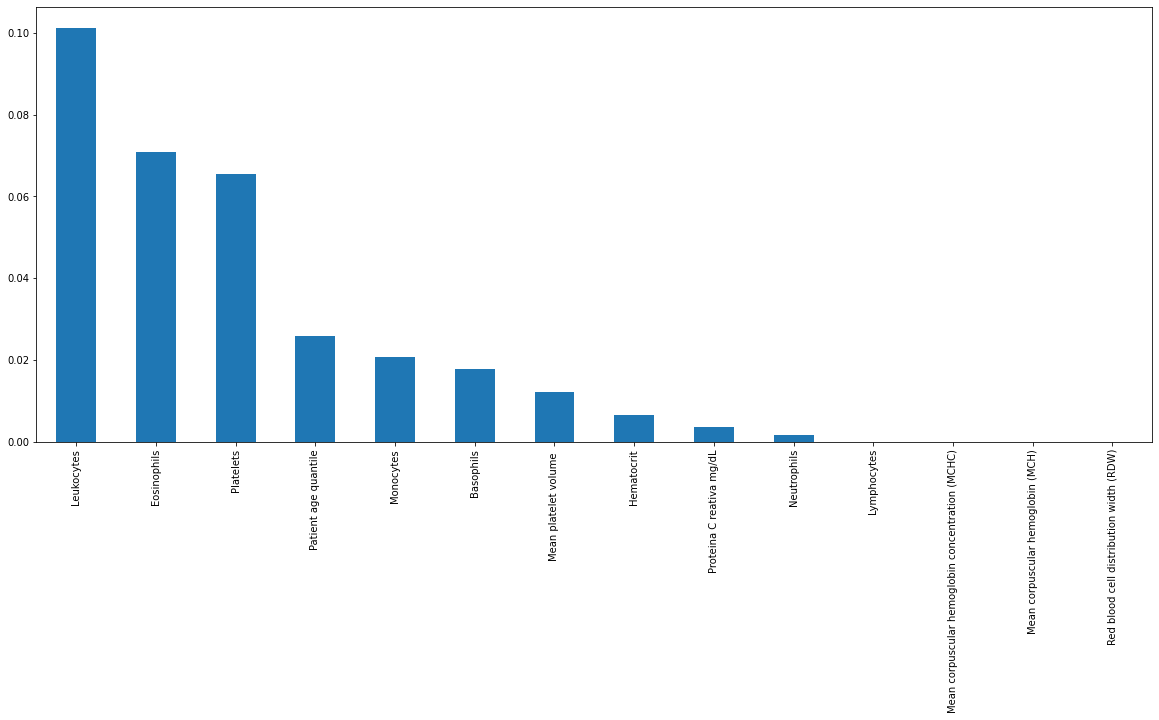

In [183]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [195]:
sel_ = SelectKBest(mutual_info_classif, k = 10).fit(X_train, y_train)

In [196]:
mi_features = list(X_train.columns[ ~ sel_.get_support()].values)

In [197]:
mi_features

['Lymphocytes',
 'Mean corpuscular hemoglobin (MCH)',
 'Red blood cell distribution width (RDW)',
 'Neutrophils']

In [198]:
X_train.drop(labels=mi_features, axis=1, inplace=True)
X_test.drop(labels=mi_features, axis=1, inplace=True)

d:\anaconda3\envs\covid-19\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [352]:
X_train.shape

(378, 10)

In [353]:
X_test.shape

(42, 10)

# 3. Classifier

In [199]:
import sklearn
import sklearn.ensemble
import sklearn.metrics
import xgboost as xgb

In [200]:
from sklearn.model_selection import cross_val_score

In [201]:
def cv_score(classifier, X, y, scoring):
    return cross_val_score(classifier, X, y, cv=5, scoring=scoring)

## 3.1 Decision Tree

In [202]:
dt = sklearn.tree.DecisionTreeClassifier()

dt_f1 = cv_score(dt, X_train, y_train, 'f1')

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [203]:
print(np.mean(dt_f1))

0.367918517521425


In [204]:
dt_pred = dt.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))

Decision Tree
Precision:  0.8809523809523809
Recal:  0.75
F1:  0.7058823529411765


In [205]:
print('Prediction:', ' '.join(str(e) for e in dt_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0


## 3.2 Random Forests

In [316]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_f1 = cv_score(rf, X_train, y_train, 'f1')

rf.fit(X_train, y_train)

RandomForestClassifier()

In [318]:
print(np.mean(rf_f1))

0.3731652661064426


In [319]:
rf_pred = rf.predict(X_test)

print("Random Forest")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))

Random Forest
Precision:  0.9047619047619048
Recal:  0.5
F1:  0.6666666666666666


In [320]:
print('Prediction:', ' '.join(str(e) for e in rf_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0


## 3.3 XGBoost

In [212]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_f1 = cv_score(xgbc, np.array(X_train), np.array(y_train), 'f1')

# Fit the models
xgbc.fit(np.array(X_train), np.array(y_train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=4, reg_lambda=1,
              scale_pos_weight=9, subsample=0.8, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [213]:
xgbc_pred = xgbc.predict(np.array(X_test))

print("XGBoost")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))

XGBoost
Precision:  0.9047619047619048
Recal:  0.75
F1:  0.75


In [214]:
print(np.mean(xgbc_f1))

0.560163372859025


In [215]:
print('Prediction:', ' '.join(str(e) for e in xgbc_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0


## 3.4 Neural Networks

In [276]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [277]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [278]:
def build_classifier() :
    nn = Sequential()
    nn.add(Dense(activation='relu', input_dim=X_train.shape[1], units=10))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer="uniform", activation='relu', units=15))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer="uniform", activation='relu', units=5))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer='uniform',activation='sigmoid', units=1))
    nn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return nn

In [279]:
nn = KerasClassifier(build_fn=build_classifier, epochs=200, batch_size=50, verbose=0)
# nn = build_classifier();

In [280]:
history = nn.fit(X_train, y_train, batch_size=50, epochs=200, validation_split = 0.2) #verbose = 2

In [281]:
import eli5
from eli5.sklearn import PermutationImportance

In [282]:
nn_results = PermutationImportance(nn, cv="prefit").fit(X_train, y_train)
nn_importance = nn_results.feature_importances_

In [283]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


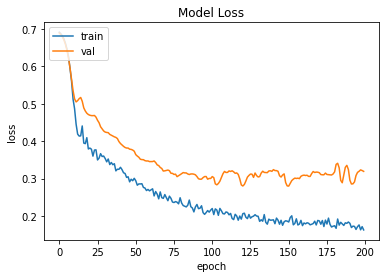

In [284]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'],loc='upper left')
plt.show()

In [285]:
nn_f1 = cv_score(nn, X_train, y_train, 'f1')

d:\anaconda3\envs\covid-19\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
d:\anaconda3\envs\covid-19\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g

d:\anaconda3\envs\covid-19\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


d:\anaconda3\envs\covid-19\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [286]:
print(np.mean(nn_f1))

0.3755582137161085


In [287]:
nn_pred = nn.predict(X_test)
nn_pred[nn_pred > 0.5] = 1
nn_pred[nn_pred <= 0.5] = 0

print("NN")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, nn_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_pred))

d:\anaconda3\envs\covid-19\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


NN
Precision:  0.9047619047619048
Recal:  0.5
F1:  0.6666666666666666


In [288]:
print('Prediction:', ' '.join(str(e[0]) for e in nn_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0


# 4. Prediction

In [289]:
import math

In [321]:
print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_pred))) / len(X_test)))

print()

print("Random Forest")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_pred))) / len(X_test)))

print()

print("XGBoost")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_pred))) / len(X_test)))

print()

print("NN")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, nn_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, nn_pred)) * (sklearn.metrics.accuracy_score(y_test, nn_pred))) / len(X_test)))


Decision Tree
Precision:  0.8809523809523809
Recal:  0.75
F1:  0.7058823529411765
CI: 0.09794178164906228

Random Forest
Precision:  0.9047619047619048
Recal:  0.5
F1:  0.6666666666666666
CI: 0.0887777082463919

XGBoost
Precision:  0.9047619047619048
Recal:  0.75
F1:  0.75
CI: 0.0887777082463919

NN
Precision:  0.9047619047619048
Recal:  0.5
F1:  0.6666666666666666
CI: 0.0887777082463919


In [322]:
print(' Decision Tree:', ' '.join(str(e) for e in dt_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_pred))
print('Neural Network:', ' '.join(str(e[0]) for e in nn_pred))
print()
print('         Truth:', ' '.join(str(e) for e in y_test))

 Decision Tree: 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0
 Random Forest: 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
       XGBoost: 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
Neural Network: 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0

         Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0


# 5. Save Results

## 5.1 Save model

In [323]:
import pickle

In [387]:
with open("model/model-3_kaggle.pkl", 'wb') as f:
    pickle.dump([dt, rf, xgbc], f)
# with open("model-4.pkl", 'wb') as f:
#     pickle.dump([dt, rf, xgbc, nn], f)
with open("dataset/dataset_kaggle.pkl", 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

In [386]:
nn.model.save('model/nn_kaggle.h5')

## 5.2 Load Model

In [7]:
import keras
from keras.models import load_model

In [8]:
nn = load_model("model/nn_kaggle.h5")

In [11]:
with open("model/model-3_kaggle.pkl", 'rb') as f:
    [dt, rf, xgbc] = pickle.load(f)

In [12]:
with open("dataset/dataset_kaggle.pkl", 'rb') as f:
    [X_train, X_test, y_train, y_test] = pickle.load(f)

# 6. Explain

## 6.3 Feature Importance

In [329]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [330]:
fi = {}
fi["dt"] = []
fi["rf"] = []
fi["xgbc"] = []
fi["nn"] = []

**Decition Tree**

In [331]:
dt_results = permutation_importance(dt, X_train, y_train, scoring='accuracy')
dt_importance = dt_results.importances_mean
for i,v in enumerate(dt_importance):
    if v != 0:
        fi["dt"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [332]:
fi["dt"] = sorted(fi["dt"], key=lambda x: x['value'], reverse=True)

**Random Forests**

In [333]:
rf_results = permutation_importance(rf, X_train, y_train, scoring='accuracy')
rf_importance = rf_results.importances_mean
for i,v in enumerate(rf_importance):
    if v != 0:
        fi["rf"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [334]:
fi["rf"] = sorted(fi["rf"], key=lambda x: x['value'], reverse=True)

**Gradient Boosted Tree**

In [335]:
xgbc_results = permutation_importance(xgbc, np.array(X_train), np.array(y_train), scoring='accuracy')
xgbc_importance = xgbc_results.importances_mean
for i,v in enumerate(xgbc_importance):
    if v != 0:
        fi["xgbc"].append({
            'name': X_train.columns[i],
            'value': v
        })

**Neural Networks**

In [336]:
for i,v in enumerate(nn_importance):
    if v != 0:
        fi["nn"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [337]:
fi["nn"] = sorted(fi["nn"], key=lambda x: x['value'], reverse=True)

**Summmary**

In [338]:
print("Decision Tree")
for i in fi["dt"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Decision Tree
Feature:           Leukocytes,	 Score: 0.026 	 Actual: 0.155
Feature:          Eosinophils,	 Score: 0.026 	 Actual: 0.075
Feature: Patient age quantile,	 Score: 0.026 	 Actual: 0.068
Feature:            Basophils,	 Score: 0.026 	 Actual: 0.052
Feature:           Hematocrit,	 Score: 0.026 	 Actual: 0.028
Feature: Proteina C reativa mg/dL,	 Score: 0.026 	 Actual: 0.026
Feature: Mean platelet volume ,	 Score: 0.026 	 Actual: 0.024
Feature:            Platelets,	 Score: 0.026 	 Actual: 0.020
Feature:            Monocytes,	 Score: 0.026 	 Actual: 0.016
Feature: Mean corpuscular hemoglobin concentration (MCHC),	 Score: 0.026 	 Actual: 0.005


In [339]:
print("Random Forests")
for i in fi["rf"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Random Forests
Feature:           Leukocytes,	 Score: 0.026 	 Actual: 0.085
Feature:          Eosinophils,	 Score: 0.026 	 Actual: 0.056
Feature:            Platelets,	 Score: 0.026 	 Actual: 0.048
Feature: Proteina C reativa mg/dL,	 Score: 0.026 	 Actual: 0.020
Feature:            Monocytes,	 Score: 0.026 	 Actual: 0.015
Feature: Patient age quantile,	 Score: 0.026 	 Actual: 0.012
Feature:           Hematocrit,	 Score: 0.026 	 Actual: 0.011
Feature: Mean corpuscular hemoglobin concentration (MCHC),	 Score: 0.026 	 Actual: 0.005
Feature:            Basophils,	 Score: 0.026 	 Actual: 0.005
Feature: Mean platelet volume ,	 Score: 0.026 	 Actual: 0.004


In [340]:
print("Gradient Boosted Trees")
for i in fi["xgbc"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Gradient Boosted Trees
Feature: Patient age quantile,	 Score: 0.026 	 Actual: 0.025
Feature:           Hematocrit,	 Score: 0.026 	 Actual: 0.012
Feature:            Platelets,	 Score: 0.026 	 Actual: 0.006
Feature: Mean platelet volume ,	 Score: 0.026 	 Actual: 0.009
Feature: Mean corpuscular hemoglobin concentration (MCHC),	 Score: 0.026 	 Actual: 0.005
Feature:           Leukocytes,	 Score: 0.026 	 Actual: 0.110
Feature:            Basophils,	 Score: 0.026 	 Actual: 0.004
Feature:          Eosinophils,	 Score: 0.026 	 Actual: 0.029
Feature:            Monocytes,	 Score: 0.026 	 Actual: 0.005
Feature: Proteina C reativa mg/dL,	 Score: 0.026 	 Actual: 0.021


In [341]:
print("Neural Networks")
for i in fi["nn"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Neural Networks
Feature:           Leukocytes,	 Score: 0.026 	 Actual: 0.051
Feature:            Platelets,	 Score: 0.026 	 Actual: 0.043
Feature:            Monocytes,	 Score: 0.026 	 Actual: 0.036
Feature:           Hematocrit,	 Score: 0.026 	 Actual: 0.029
Feature: Mean platelet volume ,	 Score: 0.026 	 Actual: 0.029
Feature:          Eosinophils,	 Score: 0.026 	 Actual: 0.027
Feature: Proteina C reativa mg/dL,	 Score: 0.026 	 Actual: 0.026
Feature: Patient age quantile,	 Score: 0.026 	 Actual: 0.021
Feature: Mean corpuscular hemoglobin concentration (MCHC),	 Score: 0.026 	 Actual: 0.021
Feature:            Basophils,	 Score: 0.026 	 Actual: 0.021


## 6.1 Partial Dependence Plot

In [342]:
from sklearn.inspection import plot_partial_dependence

In [343]:
X_train.columns

Index(['Patient age quantile', 'Hematocrit', 'Platelets',
       'Mean platelet volume ',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Eosinophils', 'Monocytes', 'Proteina C reativa mg/dL'],
      dtype='object')

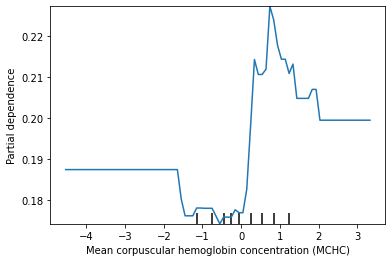

In [350]:
plot_partial_dependence(xgbc, X_train, [4]) 

In [345]:
nn._estimator_type = 'classifier'

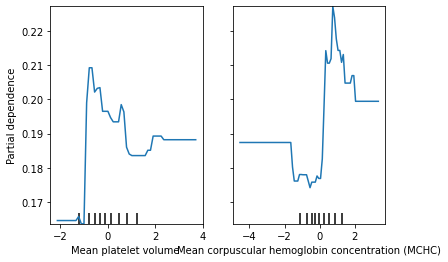

In [351]:
plot_partial_dependence(xgbc, X_train, [3, 4])
fig = plt.gcf()
fig.subplots_adjust(hspace=0.3)
# fig.savefig("nn_pdp_crp_ntproBNP")

In [347]:
covid[covid['SARS-Cov-2 exam result'] == 1]['Leukocytes'].mean()

-0.7965813644104085

In [348]:
covid[covid['SARS-Cov-2 exam result'] == 0]['Leukocytes'].mean()

-0.0010514440433713977

## 6.2 Individual Conditional Expectation (ICE)

In [160]:
def my_ice(model, X, feat_idx):
#     X = np.array(X)
    fmax, fmin = np.max(np.array(X)[:, feat_idx]), np.min(np.array(X)[:, feat_idx])
    frange = np.linspace(fmin, fmax, 100)
    preds = []
    for x in frange:
        X_ = X.copy()
        X_.iloc[:, feat_idx] = x
        pred = model.predict_proba(X_)
#         print(pred.shape)
        preds.append(pred[:, 1])
    return (frange, np.array(preds))

In [161]:
X_train.columns

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Neutrophils',
       'Proteina C reativa mg/dL'],
      dtype='object')

In [162]:
LYM_data = my_ice(xgbc, X_train, 6)
CRP_data = my_ice(xgbc, X_train, 16)

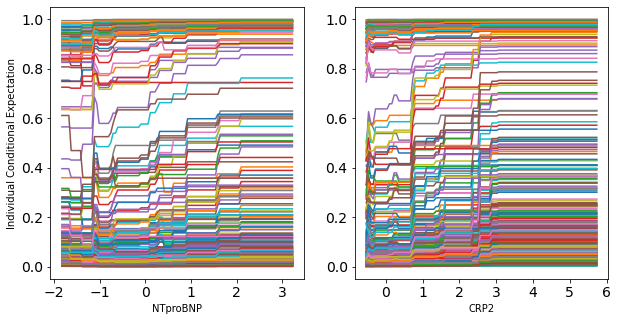

In [163]:
#           'axes.titlesize': 20}
# plt.rcParams.update(parameters)

f = plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(LYM_data[0], LYM_data[1])
plt.xlabel('NTproBNP')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel('Individual Conditional Expectation')

plt.subplot(122)
plt.plot(CRP_data[0], CRP_data[1])
plt.xlabel('CRP2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

f.savefig('nn_ice_crp_ntproBNP.png')


## 6.4 LIME

In [388]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE, weight='bold')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, linewidth='3')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [249]:
from lime import lime_tabular

In [250]:
X_train.columns

Index(['Patient age quantile', 'Hematocrit', 'Platelets',
       'Mean platelet volume ',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Eosinophils', 'Monocytes', 'Proteina C reativa mg/dL'],
      dtype='object')

In [434]:
X_train = X_train.rename(columns={"Mean corpuscular hemoglobin concentration\xa0(MCHC)": "MCHC", "Proteina C reativa mg/dL": "CRP", "Patient age quantile":"Age"})

In [435]:
X_test.iloc[0]

Patient age quantile                                14.000000
Hematocrit                                           0.923173
Platelets                                           -1.258560
Mean platelet volume                                 0.796029
Mean corpuscular hemoglobin concentration (MCHC)    -0.652057
Leukocytes                                          -1.472092
Basophils                                           -1.140144
Eosinophils                                         -0.835508
Monocytes                                            0.961600
Proteina C reativa mg/dL                             0.235598
Name: 5111, dtype: float64

In [411]:
y_test[0]

1

**Desition Tree**

In [419]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', dt.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.0
True class: positive


In [420]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

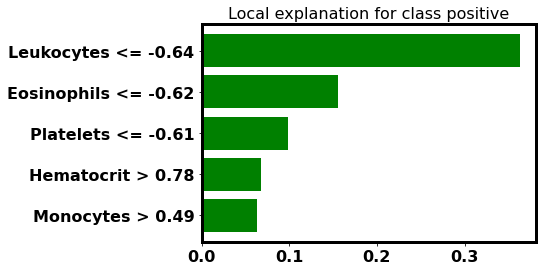

In [421]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [422]:
# exp.show_in_notebook(show_table=True, show_all=False)

**Random Forest**

In [423]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', rf.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.31
True class: positive


In [424]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = class_names, 
                                              discretize_continuous=True)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = rf.predict_proba, num_features = 5)

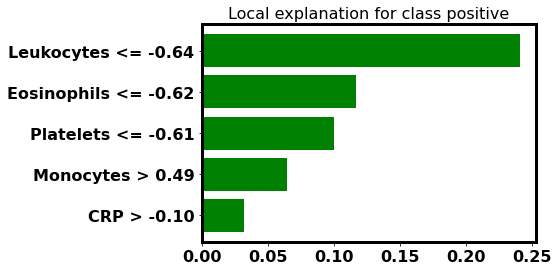

In [425]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**XGBC**

In [436]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', xgbc.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.037637055
True class: positive


In [437]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

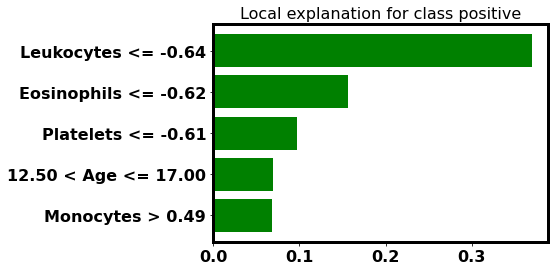

In [438]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**NN**

In [429]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', nn.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.4712
True class: positive


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


In [430]:
def predict_fn_nn(x_in):
    prob_severe = nn.predict(x_in)
    prob_normal = 1 - prob_severe
    print(np.concatenate((prob_normal, prob_severe), axis=1).shape)
    return np.array(np.concatenate((prob_normal, prob_severe), axis=1))

In [431]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = predict_fn_nn, num_features = 5)

(5000, 2)


`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


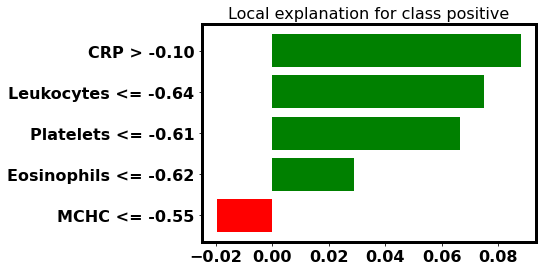

In [432]:
%matplotlib inline
fig = exp.as_pyplot_figure()

# Metrics

In [373]:
import shap
shap.initjs()
from alibi.explainers import KernelShap

In [367]:
from aix360.metrics import faithfulness_metric, monotonicity_metric

In [368]:
x = X_test.iloc[0, :]
base = np.zeros(x.shape[0])

**Random Forests**

lime

In [376]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = class_names, 
                                              discretize_continuous=True)
ncases = X_test.shape[0]

i = 0
predicted_class = rf.predict(X_test)[i]

exp = explainer.explain_instance(np.array(X_test)[i, :], rf.predict_proba, num_features=5, top_labels=1)
le = exp.local_exp[predicted_class]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]
fait = faithfulness_metric(rf, np.array(X_test)[i, :], coefs, base)
mon = monotonicity_metric(rf, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Faithfulness metric mean:  0.7101799609613241
Monotonic False


shap

In [377]:
explainer = KernelShap(rf.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)
ncases = X_test.shape[0]

i = 0
explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(rf, np.array(X_test)[i, :], explanation.shap_values[rf_pred[i]][0], base)
mon = monotonicity_metric(rf, np.array(X_test)[i, :], explanation.shap_values[rf_pred[i]][0], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Large datasets can cause slow runtimes for shap. The background dataset provided has 378 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
Using 378 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

Faithfulness metric mean:  0.8235527526674475
Monotonic False


**Gradient Boosted Trees**

Lime

In [379]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = ['normal', 'severe'], 
                                              discretize_continuous=True)
ncases = X_test.shape[0]
i = 0

predicted_class = xgbc_pred[i]

exp = explainer.explain_instance(np.array(X_test)[idx, :], xgbc.predict_proba, num_features = 10, top_labels=1)
le = exp.local_exp[1]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]

fait = faithfulness_metric(xgbc, np.array(X_test)[i, :], coefs, base)
mon = monotonicity_metric(xgbc, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Faithfulness metric mean:  0.6135881800614497
Monotonic True


SHAP

In [380]:
explainer = KernelShap(xgbc.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)

ncases = X_test.shape[0]

i = 0
explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(xgbc, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)
mon = monotonicity_metric(xgbc, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Large datasets can cause slow runtimes for shap. The background dataset provided has 378 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
Using 378 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

Faithfulness metric mean:  0.7186523949267334
Monotonic False


**Neural Networks**

lime

In [382]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = class_names,
                                              discretize_continuous=True)
ncases = X_test.shape[0]

i = 0

predicted_class = nn.predict(X_test)[i][0]

exp = explainer.explain_instance(np.array(X_test)[i, :], nn.predict_proba, num_features=10, top_labels=1)
le = exp.local_exp[predicted_class]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]

fait = faithfulness_metric(nn, np.array(X_test)[i, :], coefs, base)
mon= monotonicity_metric(nn, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


Faithfulness metric mean:  0.2539696242066665
Monotonic False


SHAP

In [384]:
explainer = KernelShap(rf.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)

ncases = X_test.shape[0]

i = 0

explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(nn, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)
mon = monotonicity_metric(nn, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Large datasets can cause slow runtimes for shap. The background dataset provided has 378 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
Using 378 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


Faithfulness metric mean:  0.4249828689906134
Monotonic False
